In [291]:
import pandas as pd
import numpy as np
import plotly.express as px
import altair as alt
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns


In [292]:
vehicles_data = pd.read_csv('../vehicles_us.csv')

In [293]:
st.header('Data Viewer')
st.dataframe(df)

DeltaGenerator()

In [294]:
vehicles_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,6/23/2018,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,10/19/2018,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2/7/2019,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,3/22/2019,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,4/2/2019,28


In [295]:
vehicles_data['date_posted'] = pd.to_datetime(vehicles_data['date_posted'], format='%m/%d/%Y')

In [296]:
vehicles_data['date_posted'].head()

0   2018-06-23
1   2018-10-19
2   2019-02-07
3   2019-03-22
4   2019-04-02
Name: date_posted, dtype: datetime64[ns]

In [297]:
vehicles_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    47906 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     46265 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      43633 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        25572 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.1+ MB


In [298]:
vehicles_data.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [299]:
vehicles_data.duplicated().sum()

0

In [300]:
vehicles_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [301]:
vehicles_data['manufacturer'] = vehicles_data['model'].str.split().str[0]

In [302]:
vehicles_data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,manufacturer
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,bmw
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,ford
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,hyundai
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,ford
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,chrysler
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,chrysler
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73,toyota
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,honda
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,kia
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,honda


In [303]:
models_per_manufacturer = vehicles_data.groupby('manufacturer')['model'].nunique().reset_index(name= 'Number of Models')
models_per_manufacturer



,manufacturer,Number of Models
0,acura,1
1,bmw,1
2,buick,1
3,cadillac,1
4,chevrolet,17
5,chrysler,3
6,dodge,3
7,ford,24
8,gmc,5
9,honda,6


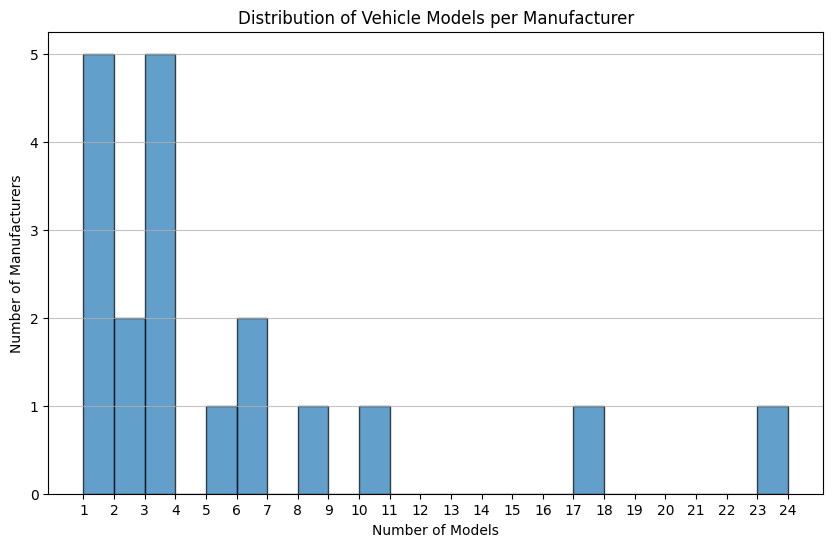

In [304]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.hist(models_per_manufacturer['Number of Models'], bins=range(1, models_per_manufacturer['Number of Models'].max() + 1), edgecolor='k', alpha=0.7)
plt.title('Distribution of Vehicle Models per Manufacturer')
plt.xlabel('Number of Models')
plt.ylabel('Number of Manufacturers')
plt.xticks(range(1, models_per_manufacturer['Number of Models'].max() + 1))  # Ensure every possible number of models is a tick
plt.grid(axis='y', alpha=0.75)

plt.show()

The most common Number of Vehicle Models per manufacturer for this dataset

In [305]:
vehicle_type_counts = vehicles_data.groupby(['manufacturer', 'type'])['model'].count().reset_index(name='Number of Vehicles')
vehicle_type_counts

,manufacturer,type,Number of Vehicles
0,acura,SUV,3
1,acura,other,2
2,acura,sedan,231
3,bmw,SUV,248
4,bmw,hatchback,1
...,...,...,...
144,volkswagen,coupe,10
145,volkswagen,hatchback,4
146,volkswagen,other,2
147,volkswagen,sedan,809


This dataframe has one row for each combination of manufacturer and vehicle type, with the count of vehicles in each combination.

In [306]:
vehicle_type_counts.head(20)

,manufacturer,type,Number of Vehicles
0,acura,SUV,3
1,acura,other,2
2,acura,sedan,231
3,bmw,SUV,248
4,bmw,hatchback,1
5,bmw,sedan,5
6,bmw,truck,3
7,bmw,van,1
8,bmw,wagon,9
9,buick,SUV,259


In [307]:

convertibles = vehicle_type_counts[vehicle_type_counts['type'] == 'convertible']
print(convertibles)


    manufacturer         type  Number of Vehicles
19     chevrolet  convertible                 236
31      chrysler  convertible                  12
52          ford  convertible                 153
71         honda  convertible                   1
91          jeep  convertible                  42
133       toyota  convertible                   2


In [308]:
pivot_df = vehicle_type_counts.pivot(index='manufacturer', columns='type', values= 'Number of Vehicles').fillna(0)

pivot_df

type,SUV,bus,convertible,coupe,hatchback,mini-van,offroad,other,pickup,sedan,truck,van,wagon
manufacturer,,,,,,,,,,,,,
acura,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,231.0,0.0,0.0,0.0
bmw,248.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,3.0,1.0,9.0
buick,259.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,8.0
cadillac,308.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,2.0,3.0,0.0,0.0
chevrolet,2285.0,0.0,236.0,985.0,34.0,2.0,14.0,52.0,1877.0,1700.0,3277.0,5.0,144.0
chrysler,1.0,0.0,12.0,4.0,1.0,238.0,0.0,3.0,0.0,541.0,0.0,37.0,1.0
dodge,7.0,0.0,0.0,9.0,1.0,396.0,2.0,5.0,104.0,402.0,135.0,190.0,4.0
ford,2222.0,23.0,153.0,828.0,246.0,1.0,9.0,33.0,2356.0,2047.0,4452.0,111.0,191.0
gmc,642.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,534.0,0.0,1188.0,1.0,6.0


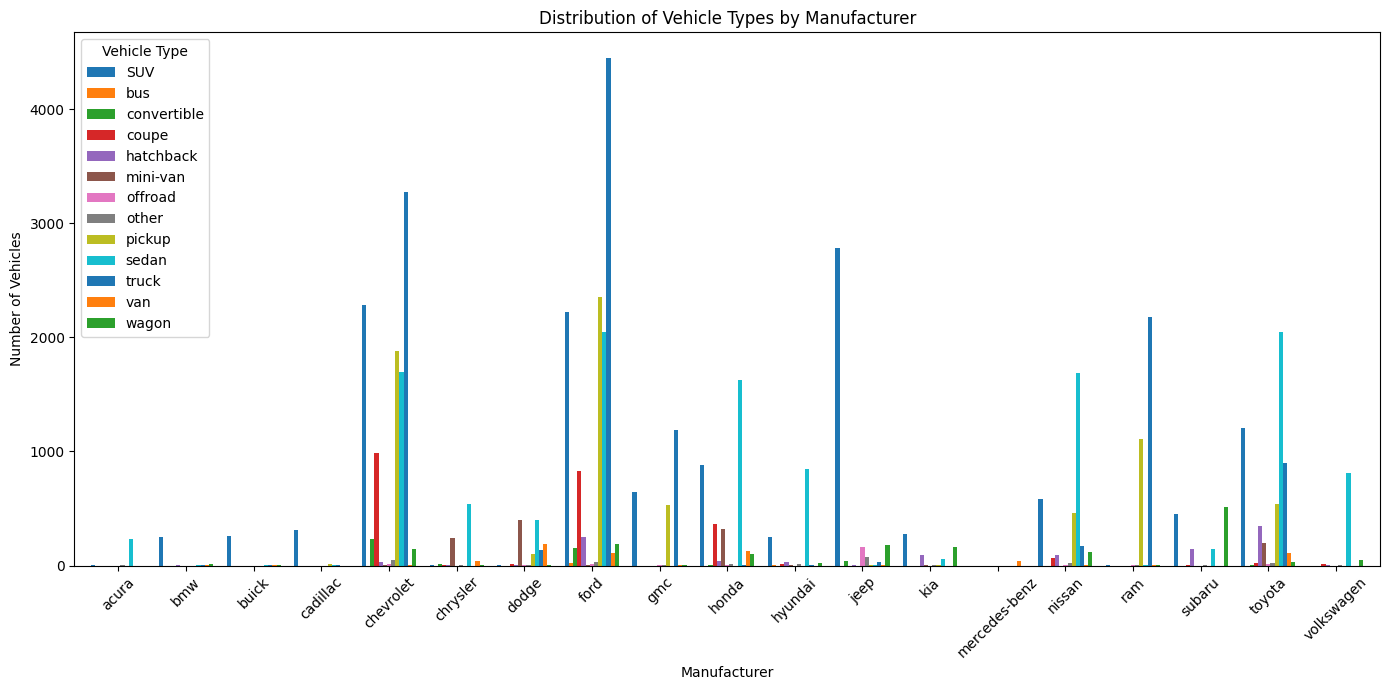

In [309]:
# Pivot for plotting
pivot_df = vehicle_type_counts.pivot(index='manufacturer', columns='type', values='Number of Vehicles').fillna(0)

# Plot
pivot_df.plot(kind='bar', figsize=(14, 7), width=0.8)
plt.title('Distribution of Vehicle Types by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Vehicles')
plt.legend(title='Vehicle Type')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

By pivoting the data each manufacturer is an index, vehicle types are columns, and the values are the counts of vehicles for each type. Missing values are filled with 0 indicating that the manufacturer does not have that vehicle type listed. 

This code created a grouped bar chart, where each group represents a manufacturer, and each bar within a group represents different vehicle types.

The chart is customizedd with titles, axis labels, and a legend for clairy. The x axis labels manufacture names are rotated or better readability

In [310]:
vehicles_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,manufacturer
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,bmw
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,ford
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,hyundai
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,ford
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,chrysler


In [311]:
model_year_and_condition = vehicles_data.dropna(subset=['model_year', 'condition'])[['model_year', 'condition']]
model_year_and_condition.head(10)


,model_year,condition
0,2011.0,good
2,2013.0,like new
3,2003.0,fair
4,2017.0,excellent
5,2014.0,excellent
6,2015.0,excellent
7,2013.0,excellent
8,2012.0,excellent
9,2008.0,excellent
10,2011.0,excellent


In [312]:
model_year_and_condition = model_year_and_condition.sort_values(by='model_year', ascending=True)
model_year_and_condition.head()

,model_year,condition
33907,1908.0,excellent
33906,1908.0,good
45694,1929.0,good
34713,1936.0,excellent
22595,1948.0,like new


This is a DataFrame of all the model_years and their corresponding conditions 